# cargando librerias

In [1]:
library(alr4)

Loading required package: car

Loading required package: carData

Loading required package: effects

lattice theme set by effectsTheme()
See ?effectsTheme for details.



# cargando datos

In [2]:
distfrenado <-read.table("Datos frenado.txt",header=T)
dist<-distfrenado$Distancia
vel <- distfrenado$Velocidad
vel2 <- distfrenado$Velocidad2

# grafica de velocidad 1 vs distancia

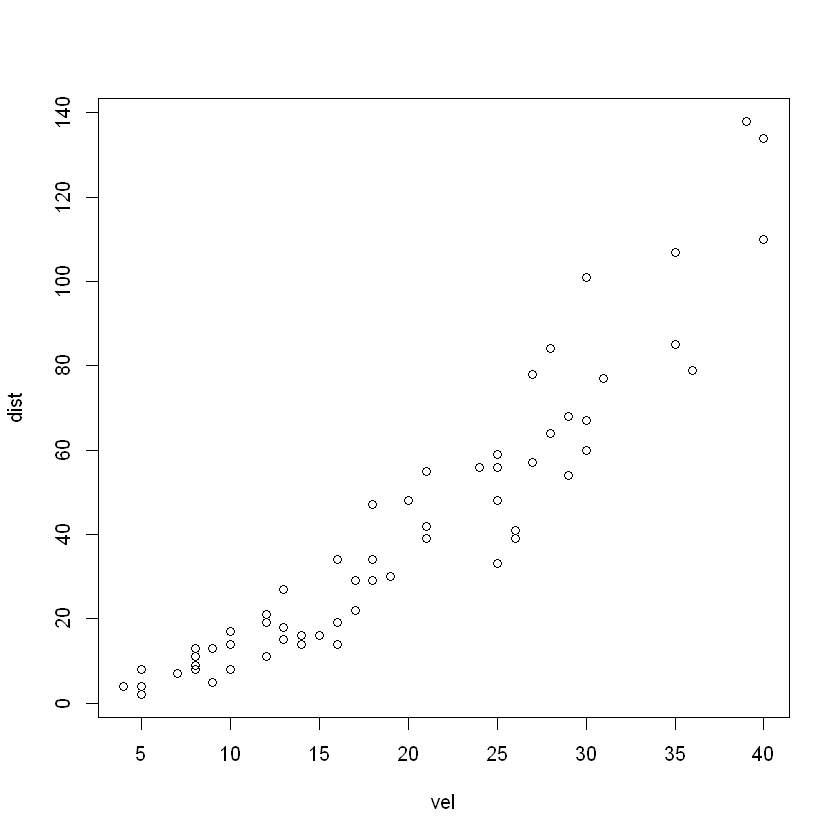

In [3]:
plot(vel,dist)

# ajustando modelo de regresion

In [4]:
regre1 <- lm(dist ~ 0 + vel + vel2)
summary(regre1)


Call:
lm(formula = dist ~ 0 + vel + vel2)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.298  -5.223  -0.259   4.198  27.771 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
vel  0.576599   0.200804   2.871  0.00564 ** 
vel2 0.062145   0.006904   9.001 9.83e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.852 on 60 degrees of freedom
Multiple R-squared:  0.9644,	Adjusted R-squared:  0.9632 
F-statistic: 813.5 on 2 and 60 DF,  p-value: < 2.2e-16


# Grafica de variable agregada 

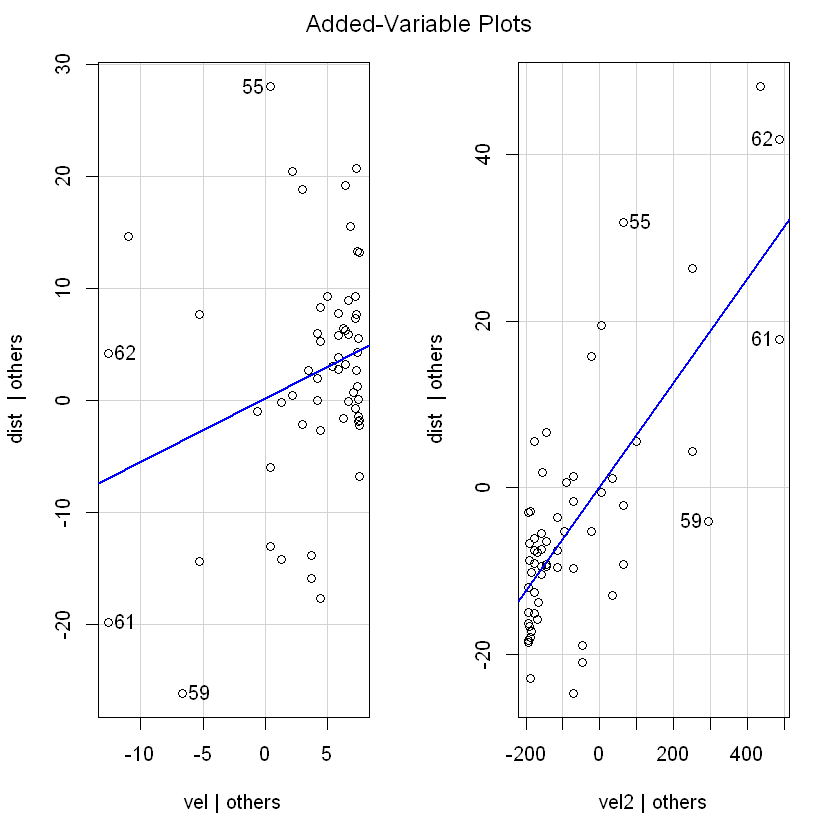

In [5]:
avPlots(regre1)

# grafica de residuos parciales

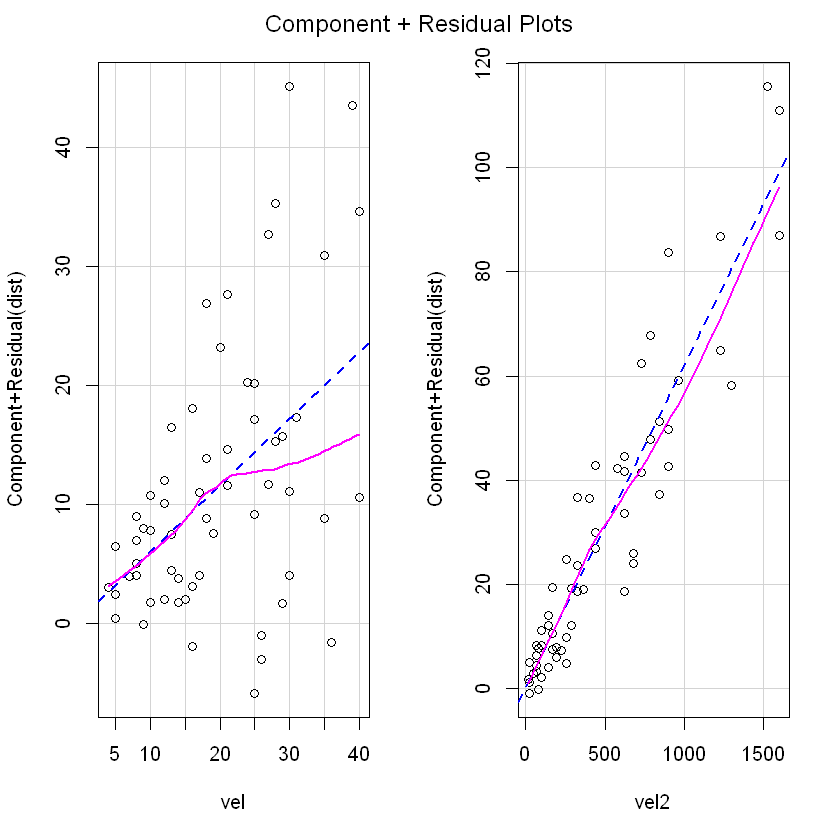

In [6]:
crPlots(regre1,smooth=T)

# Graficas de residuos y Pruebas de no linealidad

           Test stat Pr(>|Test stat|)
vel           0.6855           0.4957
vel2          0.5653           0.5740
Tukey test    0.5519           0.5810


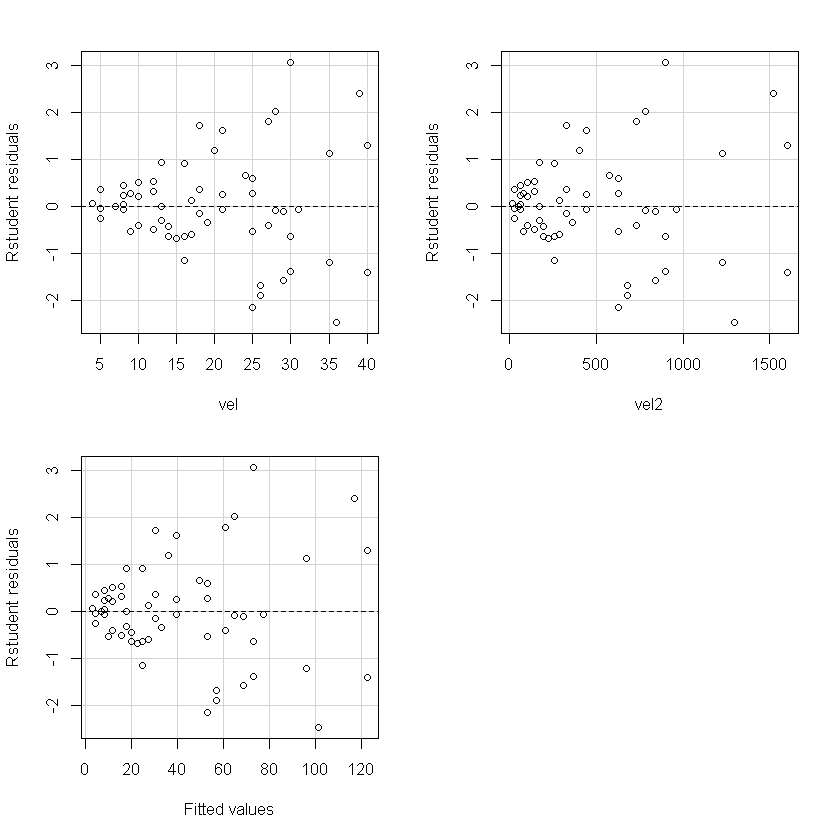

In [7]:
residualPlots(regre1, terms= ~. , type = "rstudent", quadratic=FALSE)

# Pruebas sobre homogeneidad de la varianza

In [8]:
ncvTest(regre1)
ncvTest(regre1, ~ vel + vel2)
ncvTest(regre1, ~ vel2)
ncvTest(regre1, ~ vel)

23.57714-22.92727
1-pchisq(23.57714-22.92727, df=1)

23.57714-23.47833
1-pchisq(23.57714-23.47833, df=1)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 23.20677, Df = 1, p = 1.4548e-06

Non-constant Variance Score Test 
Variance formula: ~ vel + vel2 
Chisquare = 23.57714, Df = 2, p = 7.5908e-06

Non-constant Variance Score Test 
Variance formula: ~ vel2 
Chisquare = 22.92727, Df = 1, p = 1.6825e-06

Non-constant Variance Score Test 
Variance formula: ~ vel 
Chisquare = 23.47833, Df = 1, p = 1.2633e-06

[1] 0.64987

[1] 0.4201592

[1] 0.09881

[1] 0.7532624

# Minimos cuadrados ponderados

# Pesos iguales a vel

# Usando la opcion weights 

In [9]:
 regrepond <- lm( dist ~ vel + vel2 - 1, weights=1/vel )
summary(regrepond)


Call:
lm(formula = dist ~ vel + vel2 - 1, weights = 1/vel)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-4.0703 -1.4275 -0.1057  1.3737  5.0866 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
vel  0.614461   0.158903   3.867 0.000274 ***
vel2 0.060784   0.006141   9.898 3.14e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.997 on 60 degrees of freedom
Multiple R-squared:  0.958,	Adjusted R-squared:  0.9566 
F-statistic: 683.6 on 2 and 60 DF,  p-value: < 2.2e-16


# Usando la transformacion 

In [10]:
dist.w <- dist/sqrt(vel)
vel.w <- vel/sqrt(vel)
vel2.w <- vel2/sqrt(vel)
regrepond.alt <- lm( dist.w ~ vel.w + vel2.w -1 )
summary(regrepond.alt)


Call:
lm(formula = dist.w ~ vel.w + vel2.w - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0703 -1.4275 -0.1057  1.3737  5.0866 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
vel.w  0.614461   0.158903   3.867 0.000274 ***
vel2.w 0.060784   0.006141   9.898 3.14e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.997 on 60 degrees of freedom
Multiple R-squared:  0.958,	Adjusted R-squared:  0.9566 
F-statistic: 683.6 on 2 and 60 DF,  p-value: < 2.2e-16


In [11]:
dist.w <- dist/sqrt(vel)
vel.w <- vel/sqrt(vel)
vel2.w <- vel2/sqrt(vel)
regrepond.alt <- lm( dist.w ~ vel.w + vel2.w -1 )
summary(regrepond.alt)


Call:
lm(formula = dist.w ~ vel.w + vel2.w - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0703 -1.4275 -0.1057  1.3737  5.0866 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
vel.w  0.614461   0.158903   3.867 0.000274 ***
vel2.w 0.060784   0.006141   9.898 3.14e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.997 on 60 degrees of freedom
Multiple R-squared:  0.958,	Adjusted R-squared:  0.9566 
F-statistic: 683.6 on 2 and 60 DF,  p-value: < 2.2e-16


# Precaucion con residuos del calculo usando opcion weights 

In [12]:
residuals(regrepond)
residuals(regrepond.alt)

1           2           3           4           5           6 
  0.5696117  -2.5919056  -0.5919056   3.4080944   3.4080944  -0.2796444 
          7           8           9          10          11          12 
 -0.2796444  -0.8058659   0.1941341   2.1941341   4.1941341  -5.4536555 
         13          14          15          16          17          18 
 -5.4536555   2.5463445  -4.2230132   1.7769868   4.7769868  -5.1264327 
         19          20          21          22          23          24 
  2.8735673   4.8735673  -3.2604946  -0.2604946   8.7395054  -6.5161246 
         25          26          27          28          29          30 
 -4.5161246  -6.8933226 -11.3920888  -6.3920888   8.6079112  -6.0124230 
         31          32          33          34          35          36 
  0.9875770  -1.7543253   3.2456747  16.2456747  -3.6177956  11.3971660 
         37          38          39          40          41          42 
 -0.7094405   2.2905595  15.2905595   6.2413315 -20.3515474  -5.3515474 
         43          44          45          46          47          48 
  2.6484526   5.6484526 -18.0659942 -16.0659942  -3.9020092  17.0979908 
         49          50          51          52          53          54 
 -0.8595923  19.1404077 -14.9387434  -0.9387434 -13.1394626  -6.1394626 
         55          56          57          58          59          60 
 27.8605374  -0.4617499 -10.9665797  11.0334203 -21.8967074  21.5835011 
         61          62 
-11.8328988  12.1671012

1           2           3           4           5           6 
 0.28480583 -1.15913543 -0.26470824  1.52414614  1.52414614 -0.10569565 
          7           8           9          10          11          12 
-0.10569565 -0.28491663  0.06863676  0.77574354  1.48285032 -1.81788517 
         13          14          15          16          17          18 
-1.81788517  0.84878150 -1.33543402  0.56193257  1.51061587 -1.47987366 
         19          20          21          22          23          24 
 0.82952742  1.40687769 -0.90429851 -0.07224821  2.42390267 -1.74150755 
         25          26          27          28          29          30 
-1.20698507 -1.77984825 -2.84802219 -1.59802219  2.15197781 -1.45822676 
         31          32          33          34          35          36 
 0.23952261 -0.41349843  0.76501287  3.82914226 -0.82997923  2.54848378 
         37          38          39          40          41          42 
-0.15481262  0.49984105  3.33667362  1.27400645 -4.07030947 -1.07030947 
         43          44          45          46          47          48 
 0.52969053  1.12969053 -3.54303297 -3.15080070 -0.75094202  3.29050986 
         49          50          51          52          53          54 
-0.16244767  3.61719706 -2.77405501 -0.17432027 -2.39892668 -1.12090738 
         55          56          57          58          59          60 
 5.08661493 -0.08293272 -1.85369031  1.86498841 -3.64945124  3.45612619 
         61          62 
-1.87094558  1.92378761

# Residuos correctos usando opcion pearson

In [13]:
residuals(regrepond, type="pearson")

1           2           3           4           5           6 
 0.28480583 -1.15913543 -0.26470824  1.52414614  1.52414614 -0.10569565 
          7           8           9          10          11          12 
-0.10569565 -0.28491663  0.06863676  0.77574354  1.48285032 -1.81788517 
         13          14          15          16          17          18 
-1.81788517  0.84878150 -1.33543402  0.56193257  1.51061587 -1.47987366 
         19          20          21          22          23          24 
 0.82952742  1.40687769 -0.90429851 -0.07224821  2.42390267 -1.74150755 
         25          26          27          28          29          30 
-1.20698507 -1.77984825 -2.84802219 -1.59802219  2.15197781 -1.45822676 
         31          32          33          34          35          36 
 0.23952261 -0.41349843  0.76501287  3.82914226 -0.82997923  2.54848378 
         37          38          39          40          41          42 
-0.15481262  0.49984105  3.33667362  1.27400645 -4.07030947 -1.07030947 
         43          44          45          46          47          48 
 0.52969053  1.12969053 -3.54303297 -3.15080070 -0.75094202  3.29050986 
         49          50          51          52          53          54 
-0.16244767  3.61719706 -2.77405501 -0.17432027 -2.39892668 -1.12090738 
         55          56          57          58          59          60 
 5.08661493 -0.08293272 -1.85369031  1.86498841 -3.64945124  3.45612619 
         61          62 
-1.87094558  1.92378761

# Residuos estudentizados son correctos

In [14]:
rstudent(regrepond )
rstudent(regrepond.alt )

1           2           3           4           5           6 
 0.14276883 -0.58346642 -0.13288158  0.76881805  0.76881805 -0.05315503 
          7           8           9          10          11          12 
-0.05315503 -0.14338895  0.03453690  0.39084259  0.74968403 -0.92158641 
         13          14          15          16          17          18 
-0.92158641  0.42789255 -0.67485869  0.28307372  0.76421150 -0.74832251 
         19          20          21          22          23          24 
 0.41810568  0.71108628 -0.45577544 -0.03635029  1.23519350 -0.88159203 
         25          26          27          28          29          30 
-0.60892359 -0.90084229 -1.45646090 -0.80733502  1.09211661 -0.73566244 
         31          32          33          34          35          36 
 0.12030135 -0.20763516  0.38448603  1.98523187 -0.41705883  1.29637708 
         37          38          39          40          41          42 
-0.07764054  0.25079757  1.71447571  0.64134604 -2.11936740 -0.53854312 
         43          44          45          46          47          48 
 0.26602889  0.56858102 -1.82958143 -1.61746873 -0.37809322  1.69452997 
         49          50          51          52          53          54 
-0.08181226  1.87508888 -1.42328810 -0.08794751 -1.22823540 -0.56824700 
         55          56          57          58          59          60 
 2.72914631 -0.04203710 -0.96149209  0.96744500 -1.94798203  1.87826090 
         61          62 
-1.00442980  1.03330461

1           2           3           4           5           6 
 0.14276883 -0.58346642 -0.13288158  0.76881805  0.76881805 -0.05315503 
          7           8           9          10          11          12 
-0.05315503 -0.14338895  0.03453690  0.39084259  0.74968403 -0.92158641 
         13          14          15          16          17          18 
-0.92158641  0.42789255 -0.67485869  0.28307372  0.76421150 -0.74832251 
         19          20          21          22          23          24 
 0.41810568  0.71108628 -0.45577544 -0.03635029  1.23519350 -0.88159203 
         25          26          27          28          29          30 
-0.60892359 -0.90084229 -1.45646090 -0.80733502  1.09211661 -0.73566244 
         31          32          33          34          35          36 
 0.12030135 -0.20763516  0.38448603  1.98523187 -0.41705883  1.29637708 
         37          38          39          40          41          42 
-0.07764054  0.25079757  1.71447571  0.64134604 -2.11936740 -0.53854312 
         43          44          45          46          47          48 
 0.26602889  0.56858102 -1.82958143 -1.61746873 -0.37809322  1.69452997 
         49          50          51          52          53          54 
-0.08181226  1.87508888 -1.42328810 -0.08794751 -1.22823540 -0.56824700 
         55          56          57          58          59          60 
 2.72914631 -0.04203710 -0.96149209  0.96744500 -1.94798203  1.87826090 
         61          62 
-1.00442980  1.03330461

# Pruebas de no linealidad no son correctas con la opcion weights

           Test stat Pr(>|Test stat|)
vel           0.5734           0.5686
vel2          0.5079           0.6134
Tukey test    0.5147           0.6067


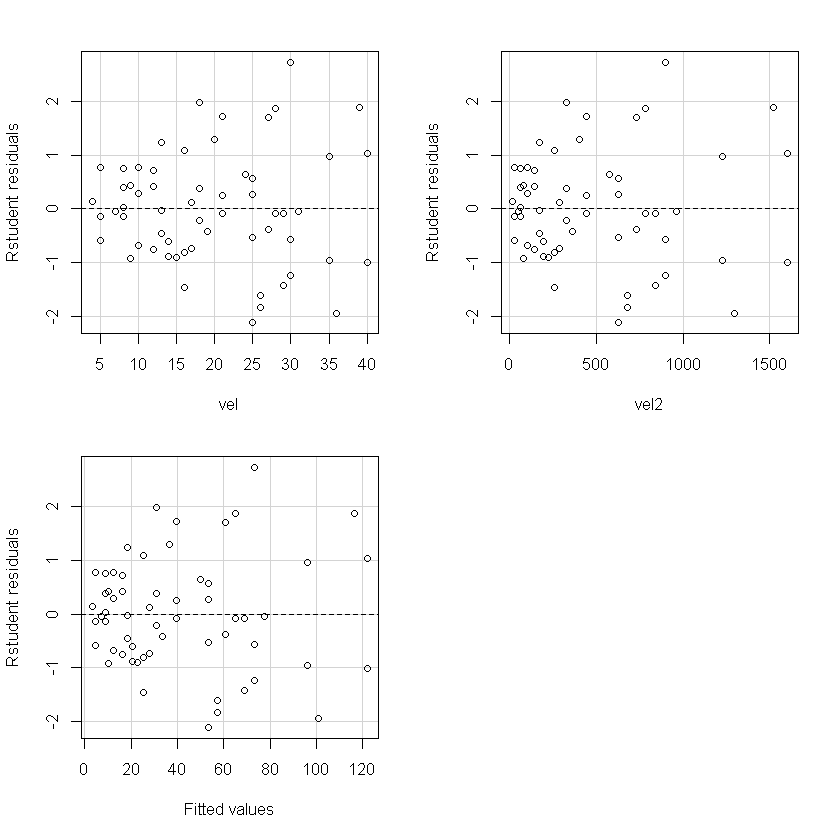

           Test stat Pr(>|Test stat|)
vel.w        -0.3993           0.6911
vel2.w        0.4351           0.6651
Tukey test    0.4315           0.6661


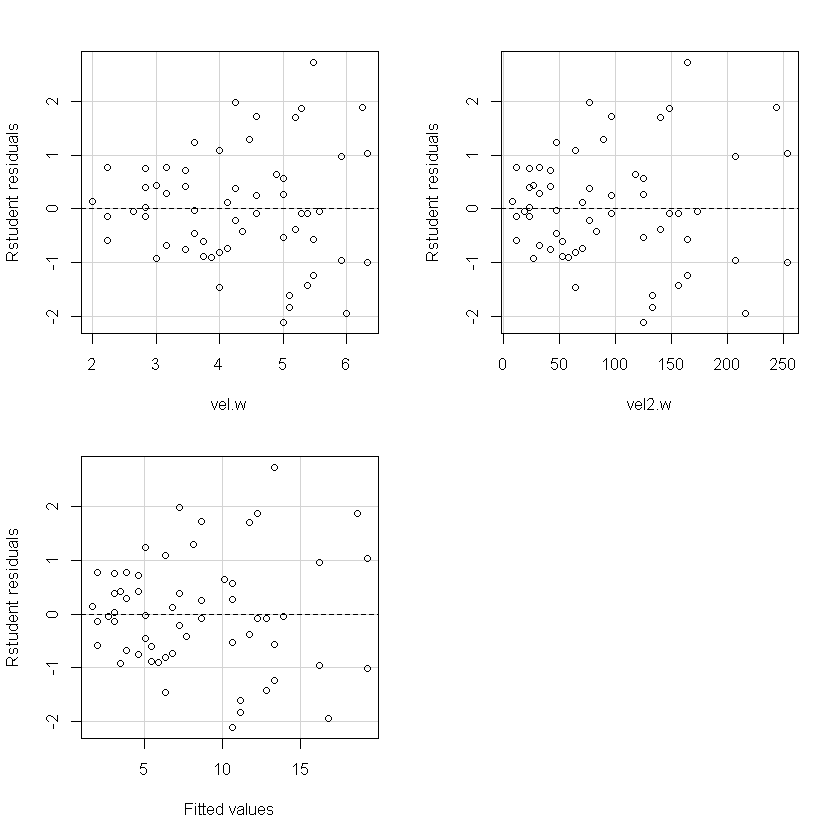

In [15]:
residualPlots(regrepond, terms= ~. , type = "rstudent", quadratic=FALSE)
residualPlots(regrepond.alt, terms= ~. , type = "rstudent", quadratic=FALSE)

# Pruebas de homogeneidad de la varianza

# Prueba homogeneidad de la varianza no es correcta con opcion weights 

In [16]:
ncvTest(regrepond)
ncvTest(regrepond, ~ vel + vel2)
ncvTest(regrepond, ~ vel2)
ncvTest(regrepond, ~ vel)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 8.382431, Df = 1, p = 0.0037887

Non-constant Variance Score Test 
Variance formula: ~ vel + vel2 
Chisquare = 9.740727, Df = 2, p = 0.0076706

Non-constant Variance Score Test 
Variance formula: ~ vel2 
Chisquare = 8.071421, Df = 1, p = 0.0044969

Non-constant Variance Score Test 
Variance formula: ~ vel 
Chisquare = 9.374131, Df = 1, p = 0.0022007

# Usando la transformacion 

In [17]:
ncvTest(regrepond.alt)
ncvTest(regrepond.alt, ~ vel.w + vel2.w)
ncvTest(regrepond.alt, ~ vel2.w)
ncvTest(regrepond.alt, ~ vel.w)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 9.013087, Df = 1, p = 0.0026805

Non-constant Variance Score Test 
Variance formula: ~ vel.w + vel2.w 
Chisquare = 9.5316, Df = 2, p = 0.0085161

Non-constant Variance Score Test 
Variance formula: ~ vel2.w 
Chisquare = 8.832982, Df = 1, p = 0.0029583

Non-constant Variance Score Test 
Variance formula: ~ vel.w 
Chisquare = 9.529293, Df = 1, p = 0.0020222

# Pesos iguales a 1/vel si vel>8

In [18]:
w2 <- rep(1,length(dist))
w2[vel>8] <- w2[vel>8]/vel[vel>8]

# Uso de la opcion weight

In [19]:
regrepond.2 <- lm( dist ~ vel + vel2 - 1, weights=w2 )
summary(regrepond.2)


Call:
lm(formula = dist ~ vel + vel2 - 1, weights = w2)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-4.1480 -1.6376 -0.2848  1.2707  5.0973 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
vel  0.717391   0.111416   6.439 2.25e-08 ***
vel2 0.057288   0.004922  11.640  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.16 on 60 degrees of freedom
Multiple R-squared:  0.9555,	Adjusted R-squared:  0.954 
F-statistic: 643.8 on 2 and 60 DF,  p-value: < 2.2e-16


# Uso de transformacion

In [20]:
dist.w2 <- dist * sqrt(w2)
vel.w2 <- vel * sqrt(w2)
vel2.w2 <- vel2 * sqrt(w2)
regrepond.alt.w2 <- lm( dist.w2 ~ vel.w2 + vel2.w2 -1 )
summary(regrepond.alt.w2)


Call:
lm(formula = dist.w2 ~ vel.w2 + vel2.w2 - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1480 -1.6376 -0.2848  1.2707  5.0973 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
vel.w2  0.717391   0.111416   6.439 2.25e-08 ***
vel2.w2 0.057288   0.004922  11.640  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.16 on 60 degrees of freedom
Multiple R-squared:  0.9555,	Adjusted R-squared:  0.954 
F-statistic: 643.8 on 2 and 60 DF,  p-value: < 2.2e-16


           Test stat Pr(>|Test stat|)
vel.w2        0.8635           0.3914
vel2.w2       0.7849           0.4357
Tukey test    0.8937           0.3715


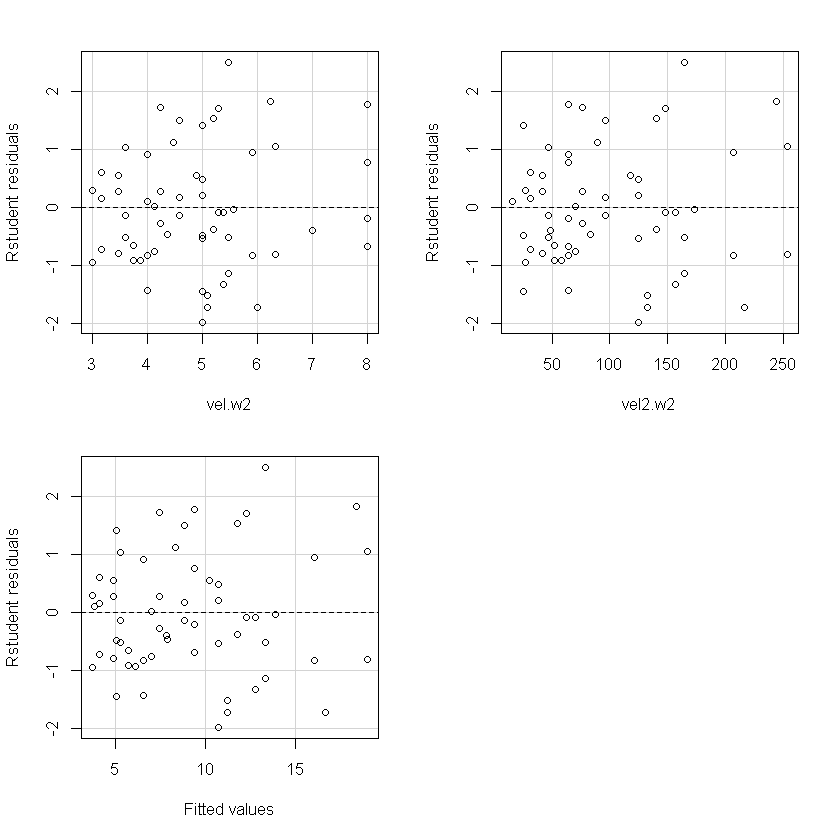

In [21]:
residualPlots(regrepond.alt.w2, terms= ~. , type = "rstudent", quadratic=FALSE)

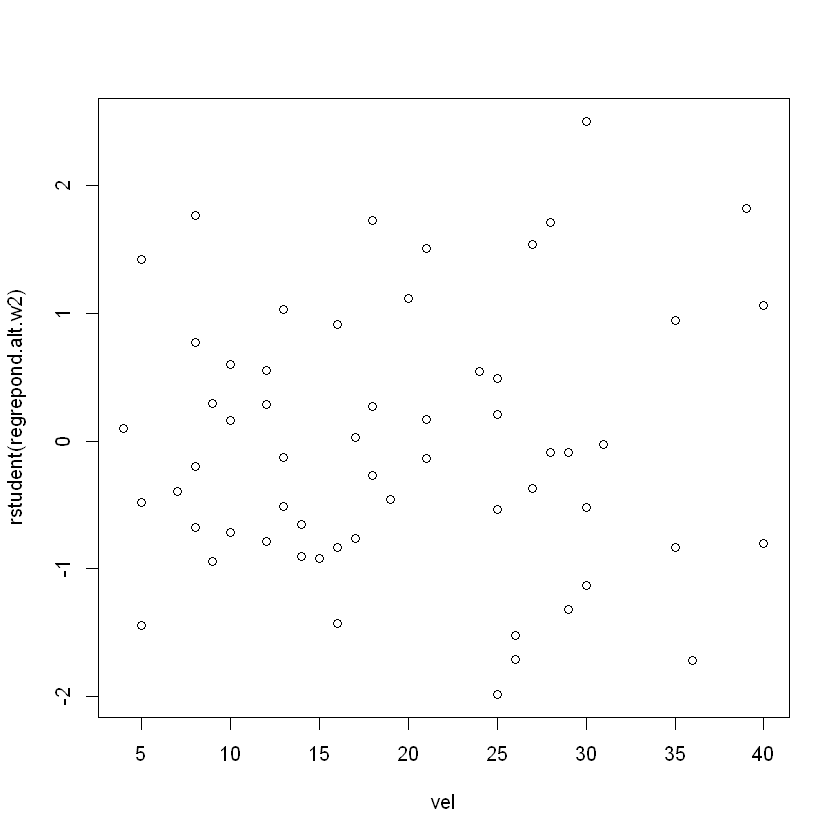

In [22]:
plot(vel,rstudent(regrepond.alt.w2))

In [23]:
ncvTest(regrepond.alt.w2)
ncvTest(regrepond.alt.w2, ~ vel.w2 + vel2.w2)
ncvTest(regrepond.alt.w2, ~ vel2.w2)
ncvTest(regrepond.alt.w2, ~ vel.w2)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 3.257906, Df = 1, p = 0.07108

Non-constant Variance Score Test 
Variance formula: ~ vel.w2 + vel2.w2 
Chisquare = 3.258281, Df = 2, p = 0.1961

Non-constant Variance Score Test 
Variance formula: ~ vel2.w2 
Chisquare = 3.114879, Df = 1, p = 0.07758

Non-constant Variance Score Test 
Variance formula: ~ vel.w2 
Chisquare = 1.300515, Df = 1, p = 0.25412

# Grafica de probabilidad normal

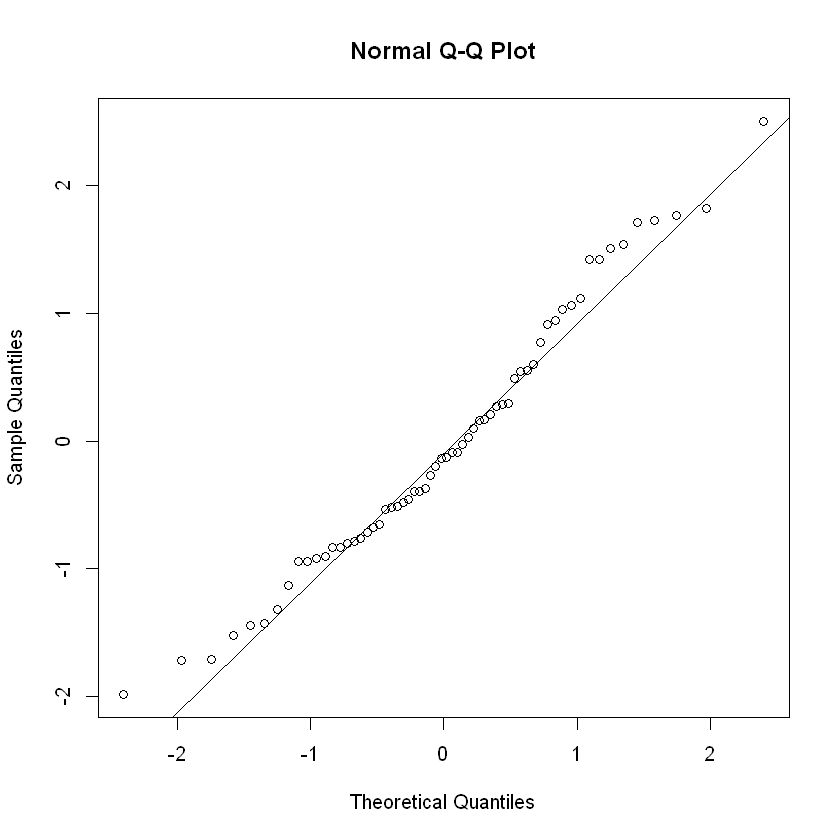

[1] 55 41

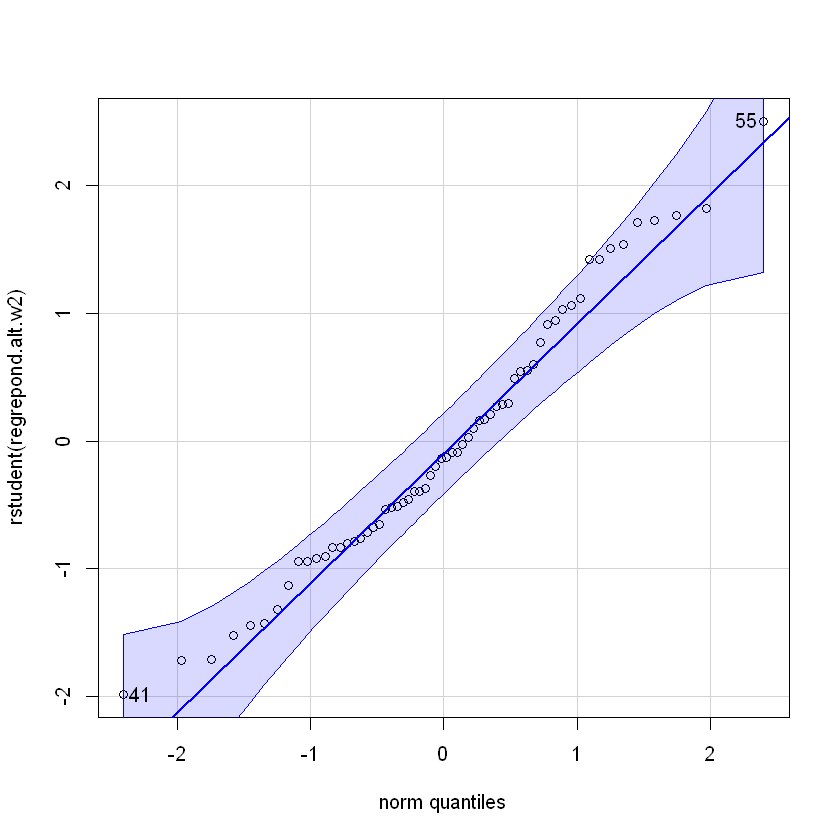

In [24]:
qqnorm(rstudent(regrepond.alt.w2))
qqline(rstudent(regrepond.alt.w2))

qqPlot(rstudent(regrepond.alt.w2))

# Prueba F falta de ajuste

In [25]:
indicador <-c(1,2,2,2,2,3,3,4,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,10,
              11,11,11,12,12,13,13,13,14,15,16,16,16,17,18,18,18,18,
              19,19,20,20,21,21,22,22,23,23,23,24,25,25,26,27,28,28)


regre.lack.fit <- lm(dist.w2 ~ factor(indicador))
anova(regrepond.alt.w2,regre.lack.fit,test="F")

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,60,279.9953,NA,NA,NA,NA
2,34,174.1513,26,105.844,0.7947766,0.7250747


# Grafica de bandas de confianza para las medias condicionales y observaciones futuras

# Nota: No se ajusto el nivel de confianza

# Usando comando weights

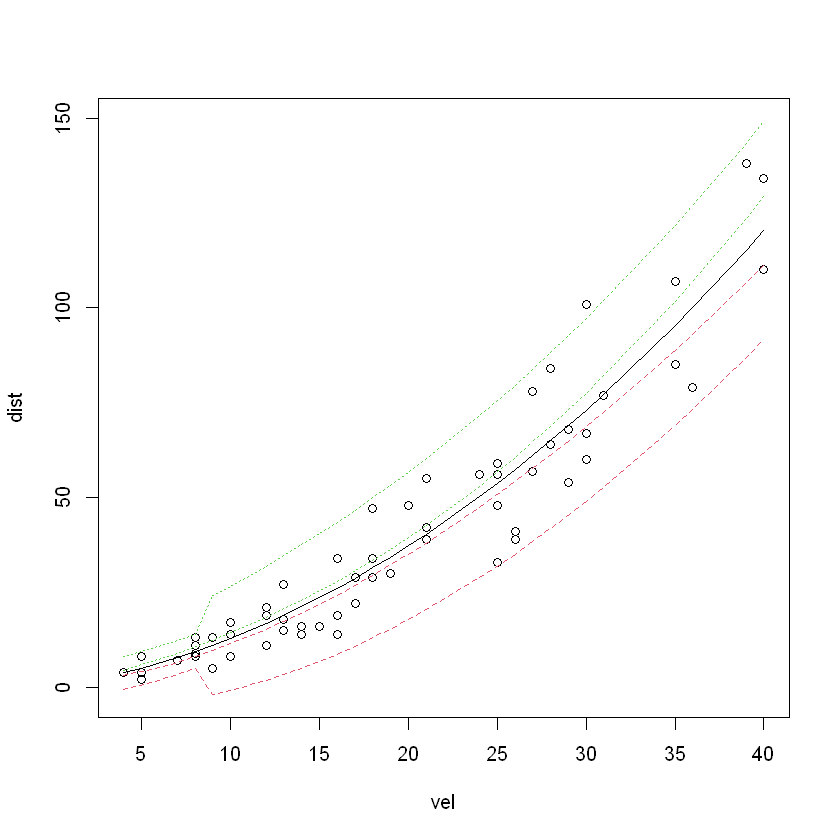

In [26]:
pred.frame <-  data.frame(vel,vel2)
predfut <- predict(regrepond.2,interval="prediction",newdata=pred.frame,weights=w2)
predmed <- predict(regrepond.2,interval="confidence",newdata=pred.frame,weights=w2) 
plot(vel,dist,ylim=range(dist,predfut))

matlines(vel,predmed)
matlines(vel,predfut)  

# Usando la transformacion 

In [27]:
predfut.alt.w2 <- predict(regrepond.alt.w2,interval="prediction",newdata=pred.frame) / sqrt(w2)
predmed.alt.w2 <- predict(regrepond.alt.w2,interval="confidence",newdata=pred.frame)/ sqrt(w2)

# Nota: Variable respuesta original: dist*sqrt(w2)

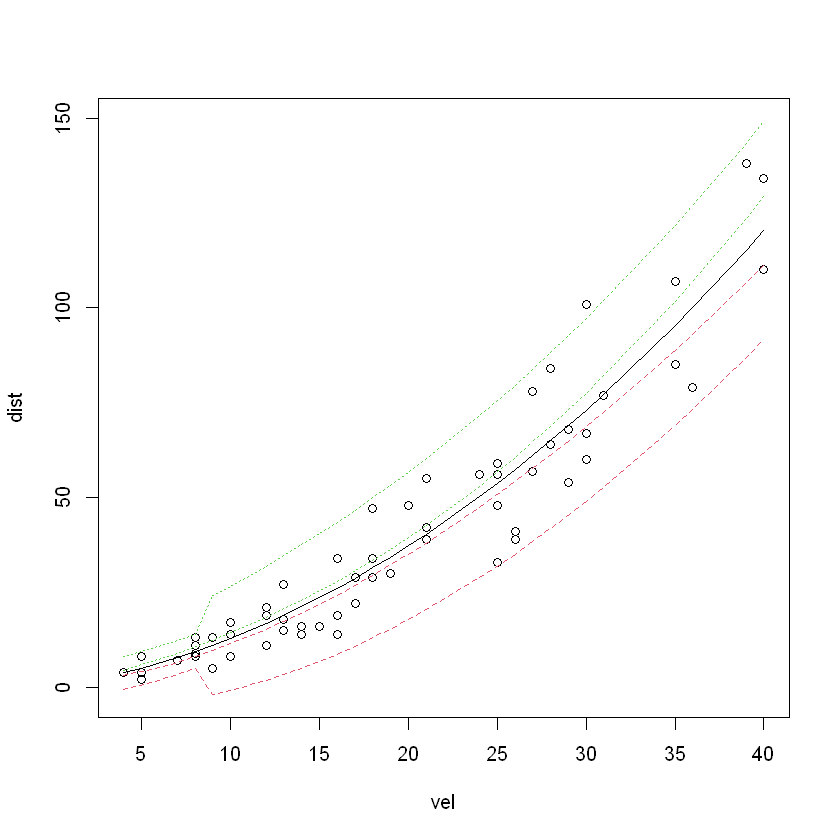

In [28]:
plot(vel,dist,ylim=range(predfut.alt.w2))  # eje Y: dist.w2/sqrt(w2)

matlines(vel,predmed.alt.w2) 
matlines(vel,predfut.alt.w2) 

# Ajustando el nivel de confianza mediante Scheffe

# Usando comando weights 

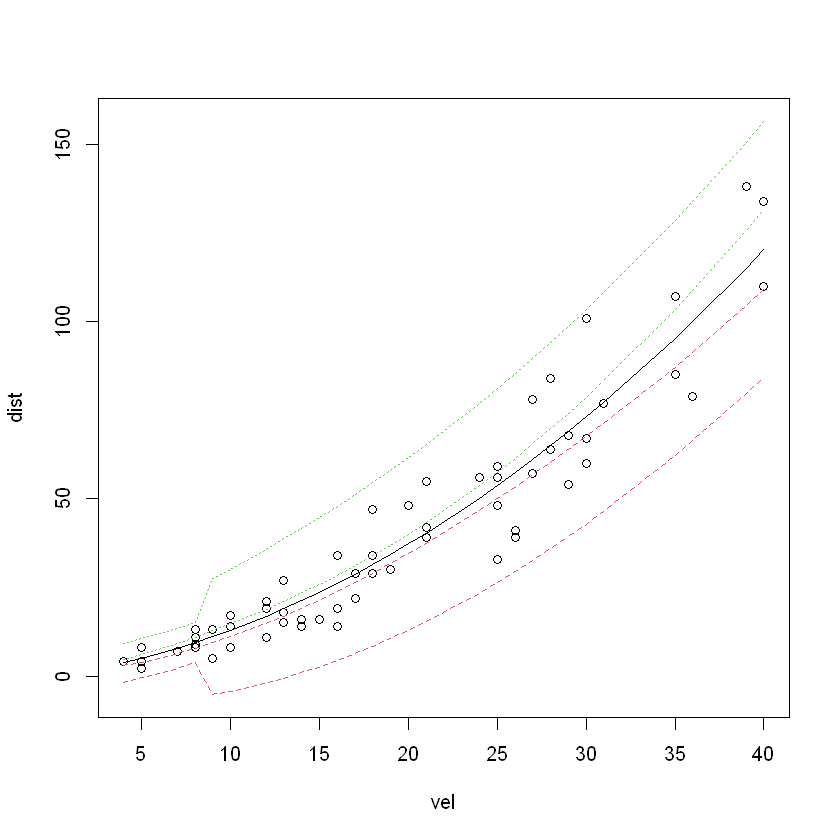

In [29]:
predmed[,3] <- predmed[,1]+sqrt(2*qf(.95,df1=2,df2=60))*( predmed[,3]-predmed[,1] ) / qt(.975,df=60)
predmed[,2] <- predmed[,1]+sqrt(2*qf(.95,df1=2,df2=60))*( predmed[,2]-predmed[,1] ) / qt(.975,df=60)

predfut[,3] <- predfut[,1]+sqrt(2*qf(.95,df1=2,df2=60))*( predfut[,3]-predfut[,1] ) / qt(.975,df=60)
predfut[,2] <- predfut[,1]+sqrt(2*qf(.95,df1=2,df2=60))*( predfut[,2]-predfut[,1] ) / qt(.975,df=60)


plot(vel,dist,ylim=range(dist,predfut))

matlines(vel,predmed)
matlines(vel,predfut)  


# Usando la transformacion 

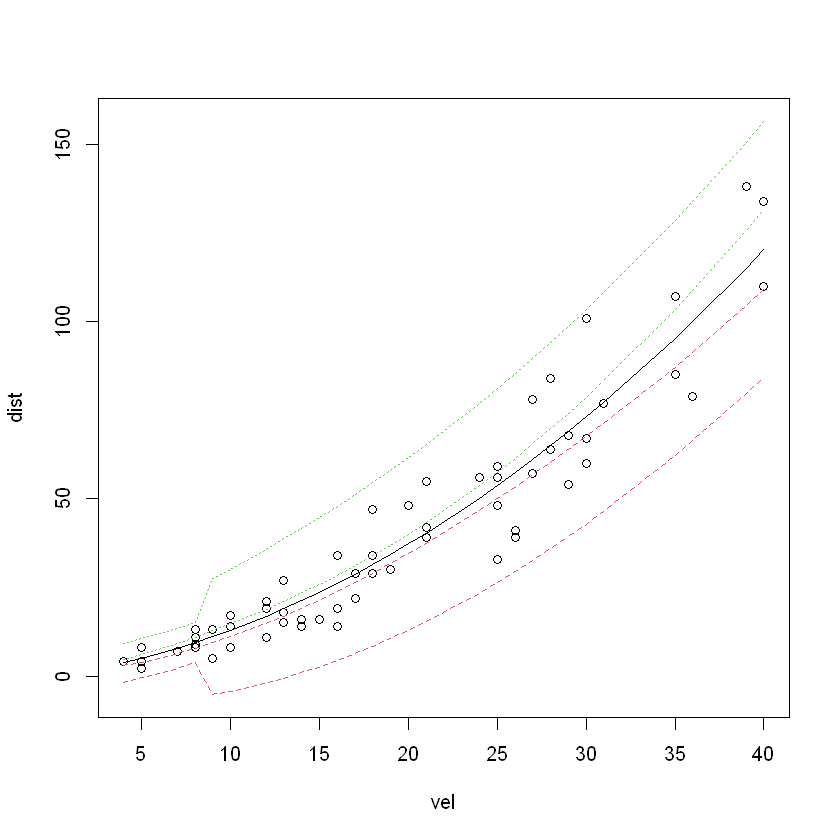

In [30]:
predmed.alt.w2[,3] <- predmed.alt.w2[,1]+sqrt(2*qf(.95,df1=2,df2=60))*( predmed.alt.w2[,3]-predmed.alt.w2[,1] ) / qt(.975,df=60)
predmed.alt.w2[,2] <- predmed.alt.w2[,1]+sqrt(2*qf(.95,df1=2,df2=60))*( predmed.alt.w2[,2]-predmed.alt.w2[,1] ) / qt(.975,df=60)

predfut.alt.w2[,3] <- predfut.alt.w2[,1]+sqrt(2*qf(.95,df1=2,df2=60))*( predfut.alt.w2[,3]-predfut.alt.w2[,1] ) / qt(.975,df=60)
predfut.alt.w2[,2] <- predfut.alt.w2[,1]+sqrt(2*qf(.95,df1=2,df2=60))*( predfut.alt.w2[,2]-predfut.alt.w2[,1] ) / qt(.975,df=60)


plot(vel,dist,ylim=range(dist,predfut.alt.w2))
matlines(vel,predmed.alt.w2)
matlines(vel,predfut.alt.w2)  

# Prueba de puntos discrepantes

In [31]:
outlierTest(regrepond.alt.w2)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
55 2.506042           0.014987      0.92917

# Diagnosticos de influencia

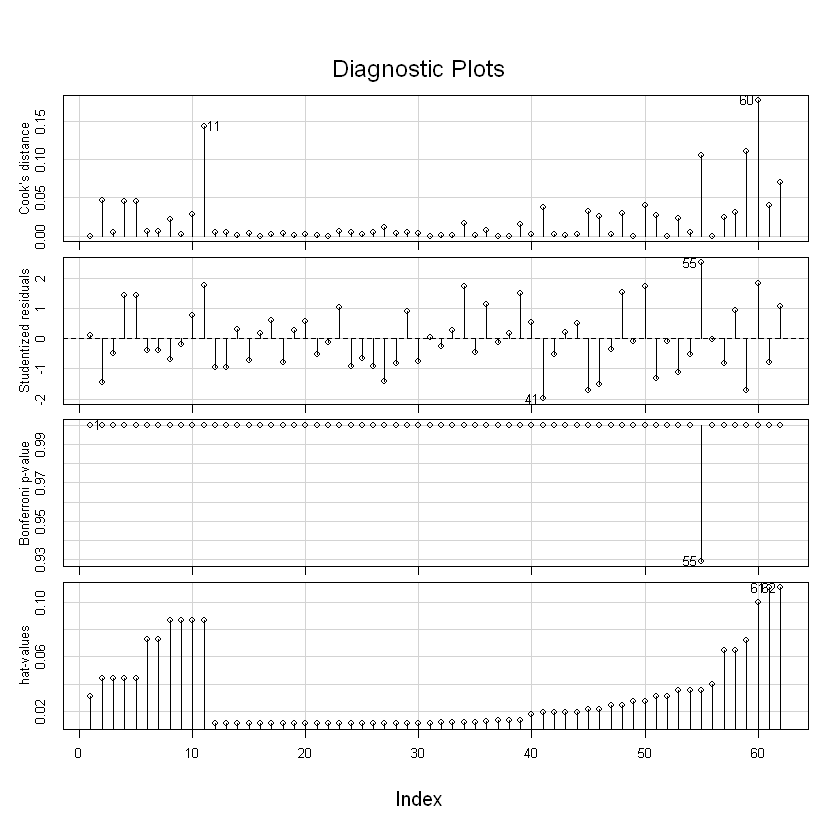

In [33]:
infIndexPlot(regrepond.alt.w2)

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
11,1.7717004,0.08653620,0.14356368
41,-1.9861485,0.01947341,0.03733943
55,2.5060425,0.03544103,0.10604589
60,1.8223191,0.09983288,0.17729122
61,-0.8013955,0.11059556,0.04016979
62,1.0599461,0.11059556,0.06970808


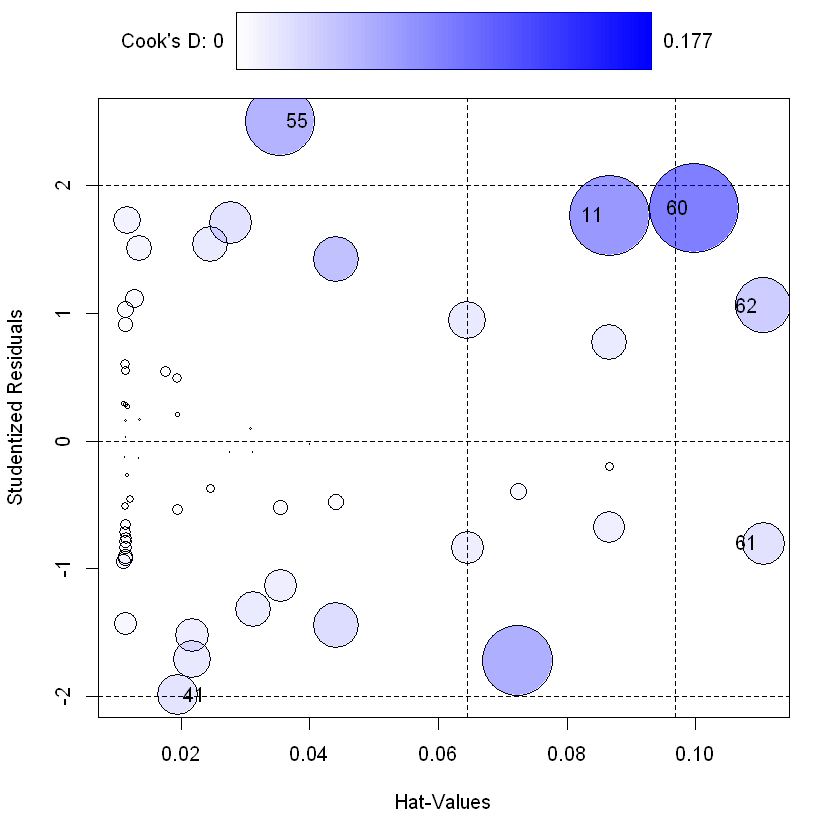

In [34]:
influencePlot(regrepond.alt.w2)

In [35]:
cooks.distance(regrepond.alt)

1            2            3            4            5            6 
1.968271e-04 3.773386e-03 1.967876e-04 6.524031e-03 6.524031e-03 3.721733e-05 
           7            8            9           10           11           12 
3.721733e-05 2.828664e-04 1.641570e-05 2.096921e-03 7.661969e-03 1.181264e-02 
          13           14           15           16           17           18 
1.181264e-02 2.575170e-03 6.435717e-03 1.139516e-03 8.234935e-03 7.755403e-03 
          19           20           21           22           23           24 
2.436782e-03 7.009189e-03 2.825842e-03 1.803759e-05 2.030274e-02 1.014847e-02 
          25           26           27           28           29           30 
4.874764e-03 1.020382e-02 2.504893e-02 7.886205e-03 1.430138e-02 6.284569e-03 
          31           32           33           34           35           36 
1.695580e-04 4.839875e-04 1.656624e-03 4.150395e-02 1.874675e-03 1.711536e-02 
          37           38           39           40           41           42 
6.182866e-05 6.445267e-04 2.872133e-02 4.338631e-03 4.667069e-02 3.227068e-03 
          43           44           45           46           47           48 
7.903760e-04 3.595078e-03 3.805294e-02 3.009398e-02 1.875185e-03 3.600458e-02 
          49           50           51           52           53           54 
9.787354e-05 4.852692e-02 3.226676e-02 1.274151e-04 2.756635e-02 6.018453e-03 
          55           56           57           58           59           60 
1.239376e-01 3.792505e-05 3.449425e-02 3.491601e-02 1.557649e-01 2.208633e-01 
          61           62 
7.540057e-02 7.971987e-02

In [36]:
sort(pf(cooks.distance(regrepond.alt.w2), 2, 60))

31           56           22           49           52           37 
4.553522e-06 1.291583e-05 9.708458e-05 1.123155e-04 1.193461e-04 1.252625e-04 
          16            1           38           32           43           33 
1.489715e-04 1.604362e-04 1.978507e-04 4.375587e-04 4.433078e-04 4.558340e-04 
          19           14           35           21           47           20 
4.762689e-04 4.901197e-04 1.302515e-03 1.534248e-03 1.746095e-03 1.779833e-03 
           9           17           44           25           40           42 
1.826070e-03 2.075077e-03 2.398840e-03 2.455982e-03 2.706054e-03 2.855766e-03 
          15           30           18           28           24           29 
2.969757e-03 3.367792e-03 3.557363e-03 3.956360e-03 4.667517e-03 4.782120e-03 
          26           54           12           13            3           23 
4.817213e-03 5.018079e-03 5.018316e-03 5.018316e-03 5.358763e-03 6.086867e-03 
           6            7           36           27           39           34 
6.182275e-03 6.182275e-03 8.026718e-03 1.138822e-02 1.513824e-02 1.707745e-02 
           8           53           57           46           51           10 
2.170592e-02 2.300256e-02 2.358942e-02 2.486799e-02 2.729776e-02 2.784023e-02 
          48           58           45           41           61           50 
2.867990e-02 3.047439e-02 3.120706e-02 3.662854e-02 3.934787e-02 3.963646e-02 
           4            5            2           62           55           59 
4.489443e-02 4.489443e-02 4.602814e-02 6.725853e-02 1.004484e-01 1.048104e-01 
          11           60 
1.334377e-01 1.620270e-01